In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime as datetime
from scipy.sparse import coo_matrix, hstack
from sklearn.manifold import TSNE

In [2]:
user_year_to_class = {}
min_year = 2005
with open("yelp_academic_dataset_user.json") as f:
    for l in f:
        line = json.loads(l)
        user = line["user_id"]
        
        elites = line["elite"]
        if "None" not in elites:
            for yr in elites:
                yr_int = int(yr)
                if yr_int - 1 >= min_year and str(yr_int - 1) not in elites:
                    user_year_to_class[(user, yr_int - 1)] = 2
                if str(yr_int + 1) in elites:
                    user_year_to_class[(user, yr_int)] = 1
                else:
                    user_year_to_class[(user, yr_int)] = 3

In [6]:
print user_year_to_class.items()[:10]

[((u'FBQ8aB_55GqvtaROAzU4Ww', 2008), 2), ((u'blrWvPePSv87aU9hV1Zd8Q', 2010), 2), ((u'XL1IkA7cKNOUFccndX2i_w', 2009), 1), ((u'ifZJeZuTTj4dfEoR29I6bA', 2011), 1), ((u'41HLwXnR0Lm3NUp01cIOQg', 2012), 1), ((u'ITf8PiWzmTzcZu3kRWEoGg', 2014), 2), ((u'-hKniZN2OdshWLHYuj21jQ', 2017), 3), ((u'd2ZZr4-jMlK0CWFOyALGNg', 2010), 3), ((u'lHGI9cubh0g4wG0LFt1rdA', 2016), 3), ((u'vJGJSKj3DRIPpQqqz_9gnQ', 2014), 2)]


In [10]:
def user_class(user, year):
    if (user, year) in user_year_to_class:
        return user_year_to_class[(user, year)]
    else:
        return 0

In [14]:
reviews = []
texts = []
classes = []
with open("yelp_academic_dataset_review.json") as f:
    for l in f:
        if len(reviews) > 10000:
            break
        line = json.loads(l)
        reviews.append(line)
        texts.append(line["text"])
        
        date = datetime.datetime.strptime(line['date'], '%Y-%m-%d')
        year = int(date.strftime('%Y'))
    
        user = line["user_id"]
        clss = user_class(user, year)
        classes.append(clss)

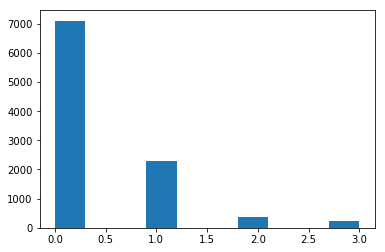

In [17]:
plt.hist(classes)
plt.show()

In [15]:
tfidf = TfidfVectorizer(stop_words="english")
trans = tfidf.fit_transform(texts)

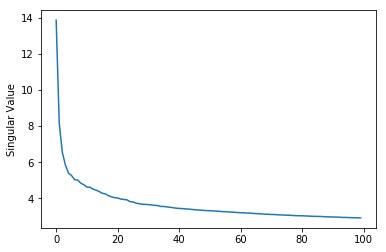

In [21]:
test_kval = 100

s= svds(trans, k=test_kval, return_singular_vectors=False)
plt.plot(range(test_kval), sorted(s, reverse=True))
plt.ylabel("Singular Value")
plt.show()

In [24]:
chosen_kval = 20
u, s, v = svds(trans, k=chosen_kval)

model = TSNE(n_components=2)
reduced = model.fit_transform(u)

### Plot T-SNE output for all of the reduced reviews

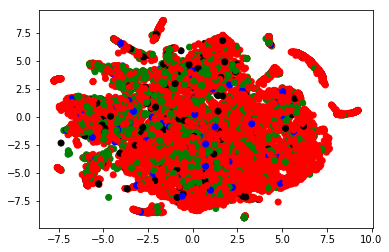

In [25]:
cmap = {0:"red", 1:"green", 2:"black", 3:"blue"}
colors = [cmap[cls] for cls in classes]
plt.scatter(reduced[:, 0], reduced[:, 1], c=colors)
plt.show()

### Plot T-SNE output for only classes 1-3, we see that there isn't much clustering...

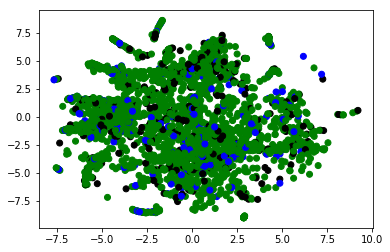

In [36]:
non_zero = []
non_zero_classes = []
for ind, cls in enumerate(classes):
    if cls != 0:
        non_zero.append(reduced[ind])
        non_zero_classes.append(cls)
colors = [cmap[cls] for cls in non_zero_classes]
plt.scatter(np.array(non_zero)[:, 0], np.array(non_zero)[:, 1], c=colors)
plt.show()